# Domača naloga 2

## Naloga 1: Izbira modelov (5 točk)

1.a: Slika prikazuje različne podatkovne množice. Za vsako sliko podatkov določi, katerega od naslednjih modelov bi bilo najbolj smiselno uporabiti:

1. SVM s polinomskim jedrom
2. Linearna regresija
3. Nevronska mreža
4. Odločitveno drevo
5. Logistična regresija
6. K najbližjih sosedov

Vsak model uporabi le enkrat in svoje odločitve pojasni.    

![alt text](zdruzene_slike.jpeg)

- SLIKA A: odločitveno drevo. Podatki so jasno razdeljeni v 3 razrede, meje med razredi so jasne in predstavniki razredi se kopičijo v "pravokotnikih".
- SLIKA B: linearna regresija. Napovedujemo zvezno spremenljivko, barve se z naraščanjem vrednosti feature_1 in feature_2 postopoma svetlijo, torej se vrednost ciljne spremenljivke povečuje približno enakomerno z naraščanjem feature_1 in feature_2, torej obstaja približno linearen odnos med feature_1, feature_2 in ciljno spremenljivko.
- SLIKA C: logistična regresija. Vidimo dva razreda, ki sta dobro ločena z linearno mejo; logistična regresija je naravna izbira za binarno klasifikacijo, kadar so razredi približno linearno ločljivi.
- SLIKA D: SVM s polinomskim jedrom. Podatki tvorijo kot neko spiralo, pri čemer se razreda prepletata.
- SLIKA E: KNN. Podatki so razpršeni in ni nekih jasnih linearnih ali pa nelinearnih mej, vidimo pa lokalne skupinice obeh razredov. Ker KNN temelji na ideji, da primeri v bližini pripadajo istemu razredu, je ta model ustrezen za ta primer podatkov.
- SLIKA F: nevronska mreža. Gre za časovno vrsto, v kateri so vrednosti urejene po času in so odvisne od prejšnjih vrednosti. Kot smo povedali tudi na vajah, so za tak tip podatkov zelo primerne rekurenčne nevronske mreže, ki si zapomnijo pretekle vrednosti in jih upoštevajo pri napovedovanju naslednjih. Zajamejo lahko nelinearne vzorce, sezonskosti, dolgoročne odvisnosti...

1.b: Spodaj so podani štirje scenariji. Na podlagi opisa podatkov in cilja predlagaj, kateri model, ki smo si ga pogledali na vajah (razen nevronskih mrež), bi bil najbolj primeren. Svojo izbiro utemelji.

1. **Napovedovanje cene nepremičnin**: Imamo podatke o nepremičninah, ki vključujejo velikost hiše (v kvadratnih metrih), število spalnic, starost hiše in povprečni dohodek v kraju. Ciljna spremenljivka je prodajna cena hiše. Opazili smo, da imajo v splošnem večje hiše in hiše na območjih z višjim povprečnim dohodkom višje prodajne cene. Potrebujemo model, pri katerem je vpliv vsake lastnosti na ceno zlahka razumljiv.

2. **Klasifikacija v skupine strank**: S podatkovnim znanstenikom smo s pomočjo nenadzorovanega učenja definirali skupine strank. Pri tem smo uporabili podatke o nakupovalnem vedenju, starosti, ... Sedaj želimo novim strankam dodeliti skupino s pomočjo klasificijskega modela. Čeprav so podatki kompleksni, znamo izračunati razdaljo med njimi. 

3. **Napovedovanje procenta konverzije spletnega mesta**: Imate nabor podatkov o obnašanju obiskovalcev spletnega mesta, vključno z virom (npr. organsko iskanje, plačani oglasi), obiskanimi stranmi, časom na spletnem mestu in tem, ali so opravili nakup. Razmerje med vedenjem in konverzijo je zapleteno in različne kombinacije dejanj lahko privedejo do konverzije, a so ti vzorci več ali manj konsistentni.

4. **Velika množica podatkov**: Imamo veliko množico podatkov v obliki spirale z dvema razredoma, podobno kot na sliki D. Potrebujemo model, ki bo hiter in učinkovit pri napovedovanju, čas učenja pa nas ne zanima.


1. Uporabimo linearno regresijo. Gre za regresijski problem s ciljno spremenljivko prodajna cena hiše, ki je zvezna količina. Podatki kažejo na linearno povezavo cene z velikostjo in območjem, kjer hiša stoji (napovedni spremenljivki). Želimo pa tudi razumeti, kako vsaka napovedna spremenljivka vpliva na napoved, kar pa nam linearna regresija omogoča, saj regresijski koeficienti povejo, koliko vplivata velikost in območje na ceno.

2. Uporabimo model k najbližjih sosedov. Imamo namreč kompleksne podatke, med katerimi pa znamo izračunati razdaljo, in točno na tem temelji metoda KNN, ki nove primere razvrsti na podlagi razdalje od obstoječih primerov. Ker so skupine definirane z nenadzorovanim učenjem, je klasifikacija z uporabo KNN najbolj logična izbira, saj ta model ne predpostavlja oblike meje med skupinami in preprosto temelji na podobnosti.

3. Uporabimo odločitveno drevo. Odločitvena drevesa namreč upoštevajo nelinearne kombinacije značilk, vzorci so konsistentni, kar je super za odločitvena drevesa.

4. Uporabimo SVM s polinomskim jedrom. Podatki so nelinearno ločljivi, ker nas učni čas ne zanima, je SVM z nelinearnim jedrom dobra izbira, ker ima visoko natančnost pri nelinearnih mejah, po učenju je klasifikacija hitra in model se dobro obnese tudi pri visoki dimenzionalnosti in kompleksnih vzorcih.

## Naloga 2: SVM. (15 točk)

2.a: Odločitvena krivulja je podana kot $w_1\cdot x_1 + w_2\cdot x_2 + \dots + w_n\cdot x_n + b = 0$. Če je primer na ali nad krivuljo, ga označimo kot pozitiven primer (razred 1), čene kot negativen primer (razred -1). Dopolni spodnjo kodo, ki napove razred danega primera (x), za krivuljo podano s parametri (w) in začetno vrednostjo (b).

In [1]:
import numpy as np

In [2]:
def napovej(x, w, b):
    return 1 if np.dot(w, x) + b >= 0 else -1
    
assert napovej(np.array([1, 1, 0.5]), np.array([1, 1, 1]), -2.5) == 1
assert napovej(np.array([1, 1, 0.5]), np.array([1, 0.9, 1]), -2.5) == -1
assert napovej(np.array([1, 1, 0.5]), np.array([1.1, 1, 1]), -2.5) == 1

2.b: Dana je slika z osmimi točkami. Najdi odločitveno krivuljo, ki dane točke loči brez napake, definiraj 5 točk, ki ležijo pod krivuljo, 5, ki ležijo na krivulji in 5, ki ležijo nad krivuljo. Preveri, da funkcija "napovej" iz naloge 2.a) pravilno deluje ter definirane točke in krivuljo vizualiziraj. 

![alt text](naloga2b.png)

Decision boundary: y = 0.500 * x + 0.750


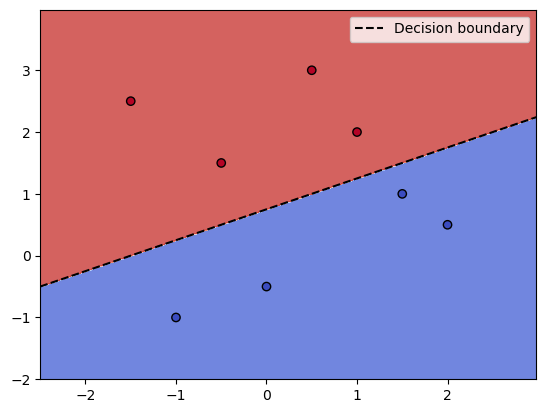

In [3]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# podatki
X = np.array([
    [2, 0.5],
    [1.5, 1],
    [0, -0.5],
    [-1, -1],
    [1, 2],
    [0.5, 3],
    [-0.5, 1.5],
    [-1.5, 2.5]
])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])


# odločitvena krivulja
def vizualize_decision_boundery(model, X, y): # funkcija iz vaj, ki jo modificiram, da še izpiše odločitveno krivuljo
    h = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    w = model.coef_[0]
    b = model.intercept_[0]

    slope = -w[0] / w[1]
    intercept = -b / w[1]

    print(f"Decision boundary: y = {slope:.3f} * x + {intercept:.3f}")

    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'k--', label="Decision boundary")
    plt.legend()

    plt.show()

model = SVC(kernel="linear", C=1.0).fit(X, y)

vizualize_decision_boundery(model, X, y)

In [4]:
# uteži in bias
w = model.coef_[0]
b = model.intercept_[0]

# generiram točke nad, na in pod odločitveno krivuljo
def gen_point(x1, offset):
    x2_on = -(w[0] * x1 + b) / w[1]
    return np.array([x1, x2_on + offset])

above_pts = np.array([gen_point(x1, 0.5) for x1 in [-2, -1, 0, 1, 2]])
on_pts    = np.array([gen_point(x1, 0.0)  for x1 in [-2, -1, 0, 1, 2]])
below_pts = np.array([gen_point(x1, -0.5) for x1 in [-2, -1, 0, 1, 2]])

# napoved razreda novo generiranih točk s pomočjo funkcije napovej
print("Predictions above:")
for pt in above_pts:
    print(f"{pt} => {napovej(pt, w, b)}")

print("Predictions on:")
for pt in on_pts:
    print(f"{pt} => {napovej(pt, w, b)}")

print("Predictions below:")
for pt in below_pts:
    print(f"{pt} => {napovej(pt, w, b)}")

Predictions above:
[-2.    0.25] => 1
[-1.    0.75] => 1
[0.   1.25] => 1
[1.   1.75] => 1
[2.   2.25] => 1
Predictions on:
[-2.   -0.25] => 1
[-1.    0.25] => 1
[0.   0.75] => 1
[1.   1.25] => 1
[2.   1.75] => 1
Predictions below:
[-2.   -0.75] => -1
[-1.   -0.25] => -1
[0.   0.25] => -1
[1.   0.75] => -1
[2.   1.25] => -1


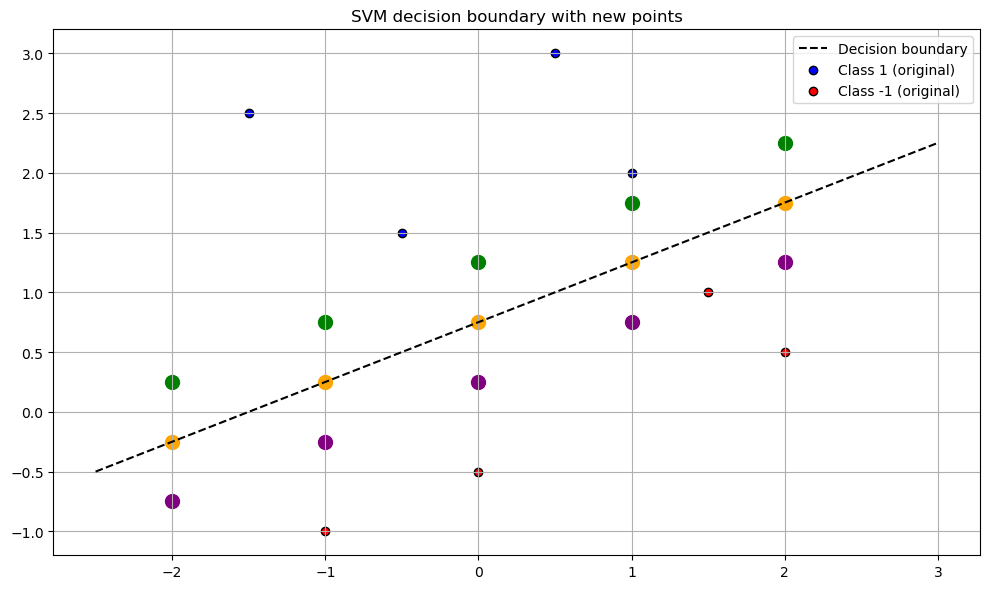

In [5]:
# VIZUALIZACIJA STARIH TOČK, NOVIH TOČK IN ODLOČITVENE KRIVULJE

plt.figure(figsize=(10, 6))

# odločitvena krivulja
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label="Decision boundary")

# originalne točke
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="b", label='Class 1 (original)', edgecolors='k')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c="r", label='Class -1 (original)', edgecolors='k')

# nove točke
plt.scatter(*above_pts.T, marker='o', c="g", s=100)
plt.scatter(*on_pts.T, marker='o', c="orange", s=100)
plt.scatter(*below_pts.T, marker='o', c="purple", s=100)

plt.title("SVM decision boundary with new points")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2.c: Sedaj bomo implementirali posebno verzijo klasifikacije z odločitveno krivuljo, ki je definirana na sledeč način:

0. Parametri algoritma so K (število korakov), $\lambda$ (hitrost učenja) in C (širina odločitvenega pasu). Poleg parametrov, naš algoritem na vhod prejme še napovedne (x) in ciljne (y) spremenljivke 
1. Na začetku $w$ in $b$ nastavimo na 0
2. Za $k= 1 \dots K$, določimo učni korak kot $\gamma_k = \frac{1}{\lambda \cdot k}$
3. Izbremo naključen podatek ($x_i$, $y_i$) in uteži posodobimo s formulo $w = (1-\gamma\cdot\lambda)\cdot w + \gamma\cdot x_i\cdot y_i$ in $b = b + \gamma\cdot y_i$, če je $y_i\cdot (w^T \cdot x_i + b) < C$ in s formulo $w = (1-\gamma\cdot\lambda)\cdot w$ čene 

Definiraj še funkcijo, ki bo našla podporne vektorje t.j., točke, ki so od odločitvene krivulje oddaljene manj kot C.

In [6]:
def psvm(X, y, T=1000, lam=0.1, C=1):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0.0

    for k in range(1, T + 1):
        gamma = 1 / (lam * k)
        i = np.random.randint(0, len(X))
        x_i, y_i = X[i], y[i]
        decision_value = y_i * (np.dot(w, x_i) + b)

        if decision_value < C:
            w = (1 - gamma * lam) * w + gamma * y_i * x_i
            b = b + gamma * y_i
        else:
            w = (1 - gamma * lam) * w

    return w, b


def find_support_vectors(X, y, w, b, C=1):
    support_indices = []
    for i in range(len(X)):
        margin = y[i] * (np.dot(w, X[i]) + b)
        if margin < C:
            support_indices.append(i)
    return support_indices

2.d: Funkcijo/model iz naloge 2.c) potestiraj na množici podatkov iz spodnje celice. Podatke, podporne vektorje in odločitveno krivuljo vizualiziraj in poročaj o uspešnosti modela ter kaj je njegova pomanjkljivost. 

In [28]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

dataset_X, dataset_y = make_circles(n_samples=500, factor=0.4, noise=0.3)
dataset_y = 2 * dataset_y - 1
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.2)

Accuracy on test set: 0.44


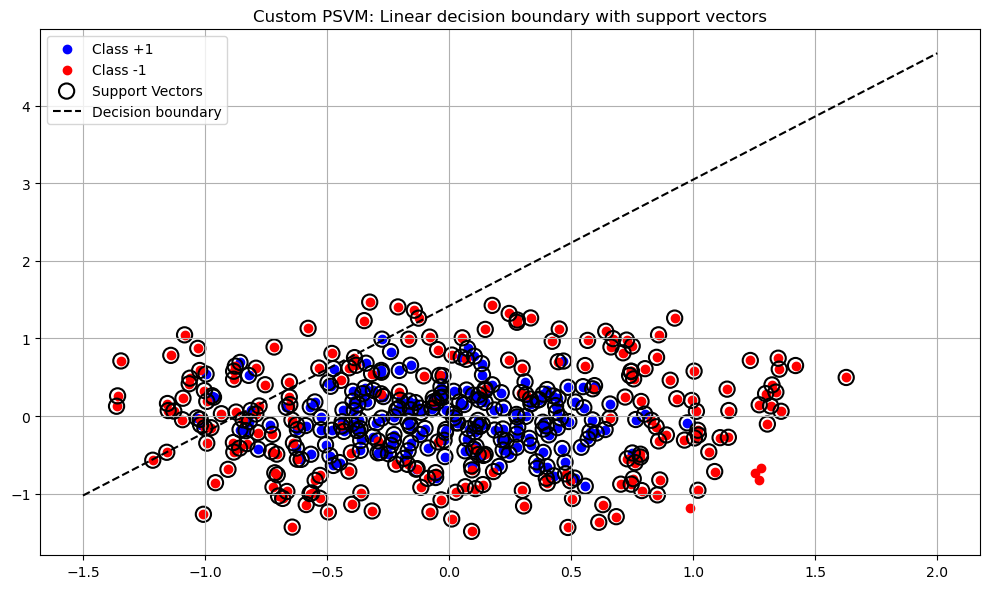

In [9]:
w, b = psvm(X_train, y_train, T=1000, lam=0.1, C=1)

def napovej(x, w, b):
    return 1 if np.dot(w, x) + b >= 0 else -1

y_pred = np.array([napovej(x, w, b) for x in X_test])
accuracy = np.mean(y_pred == y_test)

print("Accuracy on test set:", accuracy)

w, b = psvm(X_train, y_train, T=1000, lam=0.1, C=1)
sv_indices = find_support_vectors(X_train, y_train, w, b, C=1)

plt.figure(figsize=(10, 6))

plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', label='Class +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='red', label='Class -1')

plt.scatter(X_train[sv_indices][:, 0], X_train[sv_indices][:, 1],
            facecolors='none', edgecolors='black', s=120, label='Support Vectors', linewidths=1.5)

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')

plt.legend()
plt.title("Custom PSVM: Linear decision boundary with support vectors")
plt.grid(True)
plt.tight_layout()
plt.show()

Model ni uspešen, saj poskuša linearno neločljive podatke ločevati na linearen način (podatki so že generirani s pomočjo make_cirlces, kjer seveda nobena ravna črta ne mora uspešno ločevati primerov). Tudi popolen linearen klasifikator v tem primeru ne bi bil uspešen.

Namesto tega se splača uporabiti nelinearno jedro v SVM modelu.

2.e: Sedaj bomo algoritem iz naloge 2.c) prilagodili tako, da bomo z njim lahko uporabljali tudi druga jedra. To bomo naredili na sledeč način:
- Namesto uteži za posamezno dimenzijo podatkov ($w_i$), bomo sedaj imeli uteži za posamezen podatek $\alpha_i$, ki so na začetku 0.
- Namesto razdalje do odločitvene krivulje, sedaj izračunamo uteženo razdaljo do ostalih podatkov (glede na jedro), $r(x_i) = (\sum_{j=0}^{n} \alpha_j*y_j*K(x_i, x_j)) + b$, kjer je $\alpha_j$ utež podatka $x_j$, $y_j$ ciljna vrednost podatka $x_j$ in $K(x_j, x_i)$ razdalja med $x_i$ in $x_j$ glede na jedro.
- Če je razdalja podatka $x_i$ do odločitven krivulje manjša od $C$, $\alpha_i = \alpha_i + \gamma$ in $b = b + \gamma\cdot y_i$, čene pa $\alpha_i = \alpha_i * (1 - \gamma\cdot\lambda)$

Definiraj algoritem, ki bo delal s poljubnim jedrom. Pri napovedovanju namesto, da računamo razdaljo do vseh podatkov, računamo razdaljo le do podpornih vektorjev (npr. tistih podatkov, ki imajo $\alpha > 10^{-6}$)

In [11]:
def kernel_psvm(X, y, T=1000, lam=0.1, C=1.0, kernel = None):
    n_samples = X.shape[0]
    alpha = np.zeros(n_samples)
    b = 0.0

    if kernel is None: # default je linearno jedro
        kernel = lambda x, z: np.dot(x, z)

    for k in range(1, T + 1):
        gamma = 1 / (lam * k)
        i = np.random.randint(0, n_samples)
        x_i, y_i = X[i], y[i]

        # izračunamo r(x_i)
        r_i = sum(alpha[j] * y[j] * kernel(X[j], x_i) for j in range(n_samples)) + b

        if y_i * r_i < C:
            alpha[i] += gamma
            b += gamma * y_i
        else:
            alpha[i] *= (1 - gamma * lam)

    support_mask = alpha > 1e-6
    X_sv = X[support_mask]
    y_sv = y[support_mask]
    alpha_sv = alpha[support_mask]

    return X_sv, y_sv, alpha_sv, b, alpha, kernel


def kernel_predict(x, X_sv, y_sv, alpha_sv, b, kernel):
    r_x = sum(alpha_sv[i] * y_sv[i] * kernel(X_sv[i], x) for i in range(len(X_sv))) + b
    return 1 if r_x >= 0 else -1

2.f: Definiraj [polinomsko](https://en.wikipedia.org/wiki/Polynomial_kernel) in [RBF](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) jedro in posodobljen algoritem (z novimi jedri) preizkusi na podatkih iz naloge 2.d). Izriši podatke, odločitveno krivuljo in označi podporne vektorje. Dobiš sedaj boljše rezultate? Zakaj? 

In [12]:
# polinomsko in RBF jedro
def polynomial_kernel(degree=3, coef0=1): # (x^T y + c)^d
    return lambda x, y: (np.dot(x, y) + coef0) ** degree

def rbf_kernel(gamma=1.0): #e^(-\gamma * |x-y^2|)
    return lambda x, y: np.exp(-gamma * np.linalg.norm(x - y)**2)

Accuracy: 0.75


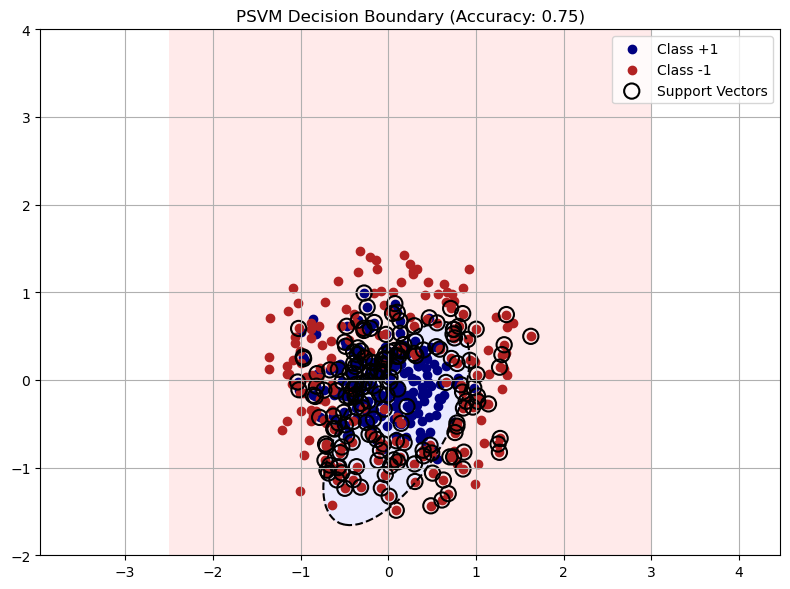

In [25]:
# test polinomskega
kernel = polynomial_kernel(degree=2, coef0=2)  
X_sv, y_sv, alpha_sv, b, used_alpha, used_kernel = kernel_psvm(X_train, y_train, kernel=kernel)

y_pred = np.array([kernel_predict(xi, X_sv, y_sv, alpha_sv, b, used_kernel) for xi in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

x_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
xx, yy = np.meshgrid(x_range, y_range)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([
    sum(a * yj * kernel(pt, xj) for a, yj, xj in zip(alpha_sv, y_sv, X_sv)) + b
    for pt in mesh_points
])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# barvanje glede na napovedan razred
plt.contourf(xx, yy, Z, levels=[-float('inf'), 0, float('inf')], colors=['#ffcccc', '#ccccff'], alpha=0.4)
# izris odločitvene krivulje
plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=1.5)

# train množica
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='navy', label='Class +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='firebrick', label='Class -1')

# podporni vektorji
plt.scatter(X_sv[:, 0], X_sv[:, 1], s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

plt.title(f"PSVM Decision Boundary (Accuracy: {accuracy})")
plt.legend(loc="upper right")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

Accuracy: 0.9


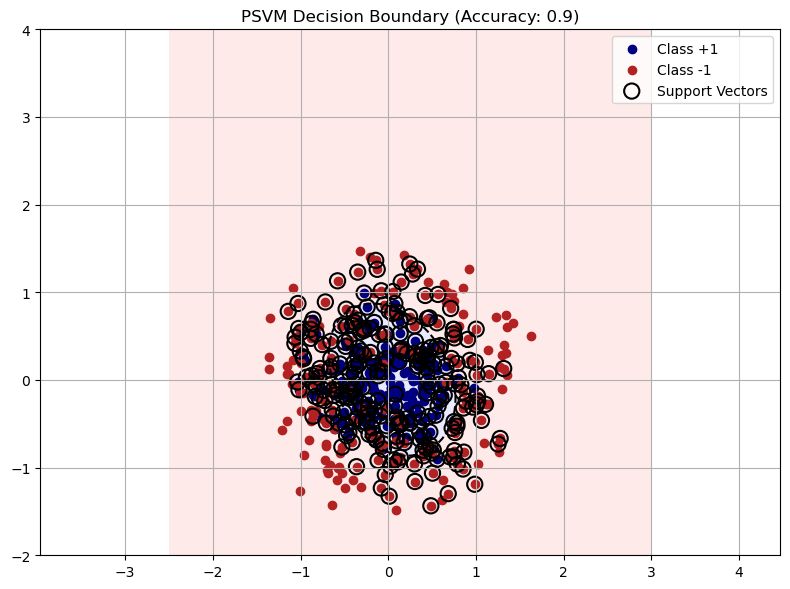

In [26]:
# rbf jedro
kernel = rbf_kernel(gamma=0.5)  
X_sv, y_sv, alpha_sv, b, used_alpha, used_kernel = kernel_psvm(X_train, y_train, kernel=kernel)

y_pred = np.array([kernel_predict(xi, X_sv, y_sv, alpha_sv, b, used_kernel) for xi in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

x_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
xx, yy = np.meshgrid(x_range, y_range)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([
    sum(a * yj * kernel(pt, xj) for a, yj, xj in zip(alpha_sv, y_sv, X_sv)) + b
    for pt in mesh_points
])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, levels=[-float('inf'), 0, float('inf')], colors=['#ffcccc', '#ccccff'], alpha=0.4)

plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=1.5)

plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='navy', label='Class +1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='firebrick', label='Class -1')

plt.scatter(X_sv[:, 0], X_sv[:, 1], s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

plt.title(f"PSVM Decision Boundary (Accuracy: {accuracy})")
plt.legend(loc="upper right")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

## Naloga 3: Nevronske mreže (10 točke)

V datoteki "facial_expressions.zip" boš našel mapi z učnimi in testnimi slikami, iz katerih se želimo naučiti nevronsko mrežo, ki bo napovedovala čustveno stanje človeka glede na njegovo obrazno mimiko. Celoten postopek in vse poskuse (tudi neuspele) zabeleži in o njih poročaj v poročilu. Poročaj tudi o metriki, ki si jo izbral, pojasni, zakaj si se za njo odločil in kakšen rezultat si dobil.

Namig: Podatkovni množici boš najlažje sestavil s pomočjo razreda [torchvision.datasets.ImageFolder](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html).

In [1]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [19]:
train_pot = "facial_expressions/train"
test_pot = "facial_expressions/test"

# najprej bom ustvarila ločeno verzijo train_set-a brez normalizacije, da preverim, 
# kakšna sta povprečje in std. odklon, da lahko karseda natančno normaliziram podatke
# pred definicijo in učenjem nevronske mreže

transform1 = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # da imam na vhodu samo en kanal namesto 3
# plusi so, da bo lahko tudi učenje hitrejše, lahko bo manj overfittinga, na izgled so bile itak slike črnobele in s tem nič ne izgubim
    transforms.Resize((48, 48)), # resizam, če slučajno nebi bile vse slike iste velikosti
    transforms.ToTensor()
])

train_set1 = datasets.ImageFolder(root=train_pot, transform=transform1)

loader = DataLoader(train_set1, batch_size=64, shuffle=False)

mean = 0.0 # rabim floate
std = 0.0
nb_samples = 0.0

for data, razredi in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, -1) # splošči slike
    mean += data.mean(1).sum() # dodam vsoto povprečij vsake slike v batchu k skupni vsoti
    std += data.std(1).sum()
    nb_samples += batch_samples # da šteješ, koliko slik si že pogledal

mean = mean/nb_samples
std = std/nb_samples

print("Mean:", mean.item())
print("Std:", std.item())

Mean: 0.5077385902404785
Std: 0.21202482283115387


In [104]:
# pretvorim slike v tenzorje in jih normaliziram
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)), # resizam, če slučajno nebi bile vse slike iste velikosti
    transforms.ToTensor(),
    transforms.Normalize((0.5077, ), (0.2120, ))
])

train_set = datasets.ImageFolder(root=train_pot, transform=transform)
test_set = datasets.ImageFolder(root=test_pot, transform=transform)

batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# train_loader ima shuffle na True, ker mešamo zaporedje učnih podatkov vsakič,
# ko poženemo kodo, ker je fino, da model ne vidi vedno podatkov v istem vrstnem redu
# test_loader pa ne meša podatkov, ker bi radi stalno oceno uspešnosti

Vizualiziram nekaj slik iz učne množice:

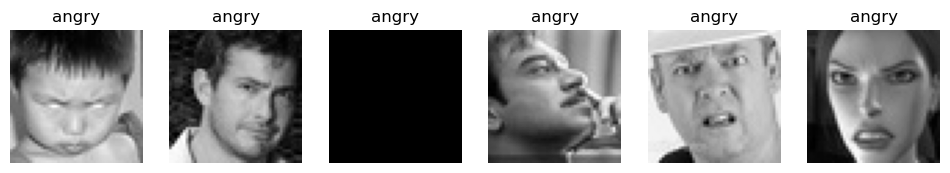

In [92]:
razredi = train_set.classes

def show_images(dataset, n=6):
    plt.figure(figsize=(12, 3))
    for i in range(n):
        img, label = dataset[i]
        plt.subplot(1, n, i+1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(razredi[label])
        plt.axis("off")
    plt.show()

show_images(train_set)

Izpišem število vseh slik, preverim, da res imamo vse razrede in še preverim, da transformacije ustrezno delujejo:

In [27]:
print("Število učnih slik:", len(train_set))
print("Število testnih slik:", len(test_set))
print("Razredi:", train_set.classes)

# preverim še delovanje transformacij na nekaj slikah iz train seta
def preveri_transformacije(dataset, n=5):
    for i in range(n):
        img, label = dataset[i]
        print(f"Slika {i+1}: oblika = {img.shape}, min = {img.min()}, max = {img.max()}, povp. = {img.mean()}")

preveri_transformacije(train_set)

Število učnih slik: 28709
Število testnih slik: 7178
Razredi: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Slika 1: oblika = torch.Size([1, 48, 48]), min = -2.339317560195923, max = 1.2492878437042236, povp. = -0.4340190589427948
Slika 2: oblika = torch.Size([1, 48, 48]), min = -2.3948113918304443, max = 2.322169780731201, povp. = -0.5781651735305786
Slika 3: oblika = torch.Size([1, 48, 48]), min = -2.3948113918304443, max = -2.3948113918304443, povp. = -2.3948113918304443
Slika 4: oblika = torch.Size([1, 48, 48]), min = -2.3948113918304443, max = 2.2666757106781006, povp. = -0.23819272220134735
Slika 5: oblika = torch.Size([1, 48, 48]), min = -2.339317560195923, max = 2.007704257965088, povp. = 0.6329378485679626


Normalizacija je bila izvedena s povprečjem in odklonom, izračunanim na celotnem učnem naboru. Posamezne slike imajo sicer še vedno odstopanja od povprečja, kar je lahko posledica npr. razlik v osvetljenosti obrazov, ampak to ne vpliva negativno na učenje.

Zdaj se lotim sestavljanja konvolucijske nevronske mreže. Imamo 7 čustev, moj model bo torej prejemal slike oblike [1, 48, 48] in napovedal verjetnosti za vsak izmed 7 čustev oz. razredov.

In [93]:
import torch.nn as nn

class EmotionCNN(nn.Module):
    def __init__(self):
        super(EmotionCNN, self).__init__()

        self.convolution = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=1), # dodam padding, da se slike ne manjšajo; stride=1, da se premikamo po en piksel in se obdela vsa slika, stride=1 uporabim v konvolucijskih slojih, da ohranim ločljivost lokalnih značilnosti obraza
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # v maxpooling slojih pa uporabim stride=2, s čimer nadzorovano zmanjšujem dimenzije slik in s tem kompleksnost mreže

            nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1), # naredim 3 sloje, ker so slike 48x48
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*6*6, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3), # preprečuje overfitting: med učenjem slučajno izključi 30% nevronov na tisti plasti, da se model ne bi preveč zanašal na točno določene aktivacije; med testiranjem je izklopljen.
            nn.Linear(128, 7)
        )

    def forward(self, x):
        x = self.convolution(x)
        x = self.fc(x)
        return x

INICIALIZACIJA MODELA:

In [94]:
torch.manual_seed(42)
model = EmotionCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # uporabim Adam, ker je bolj robusten od navadnega SGD
# learning rate pa kot privzeto 0.001, ker je dovolj majhen, da ne prekoči optimalne točke, ampak dovolj velik, da učenje ne bo prepočasno

TRENIRANJE MODELA:

In [95]:
from tqdm import tqdm

def train_model(model, train_loader, optimizer, loss_fn, epochs):
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        with tqdm(total=len(train_loader.dataset), desc=f"Epoch {epoch+1}/{epochs}", unit="images") as prog_bar:
            for i, (inputs, labels) in enumerate(train_loader):
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(**{"loss": total_loss / (i + 1), "acc": correct / total})
                prog_bar.update(labels.size(0))

        print(f"Epoch {epoch+1} complete. Final Loss: {total_loss / len(train_loader)}, Accuracy: {correct / total}")


TESTIRANJE MODELA:

In [96]:
def test_model(model, test_loader):
    model.eval()

    correct = 0
    total = 0
    total_loss = 0
    loss_fn = nn.CrossEntropyLoss()

    with torch.no_grad():
        with tqdm(total=len(test_loader.dataset), desc="Evaluating", unit="images") as prog_bar:
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                total_loss += loss.item()

                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(**{"loss": total_loss / (total / labels.size(0)), "acc": correct / total})
                prog_bar.update(labels.size(0))

    print(f"Test Accuracy: {correct / total}, Avg. Loss: {total_loss / len(test_loader)}, Correct predictions: {int(correct)} / {total}")


In [43]:
print("Accuracy on the test set before training:")
test_model(model, test_loader)

epochs = 10
train_model(model, train_loader, optimizer, loss_fn, epochs)

print("Accuracy on the test set after training:")
test_model(model, test_loader)


Accuracy on the test set before training:


Evaluating: 100%|██████████| 7178/7178 [00:04<00:00, 1707.17images/s, acc=0.115, loss=0.155]


Test Accuracy: 0.11549178044023405, Avg. Loss: 1.950282383383366, Correct predictions: 829 / 7178


Epoch 1/10: 100%|██████████| 28709/28709 [00:33<00:00, 868.80images/s, acc=0.336, loss=1.67] 


Epoch 1 complete. Final Loss: 1.6655593660142687, Accuracy: 0.33581803615590927


Epoch 2/10: 100%|██████████| 28709/28709 [00:30<00:00, 953.34images/s, acc=0.44, loss=1.45]  


Epoch 2 complete. Final Loss: 1.452141458193461, Accuracy: 0.44045421296457554


Epoch 3/10: 100%|██████████| 28709/28709 [00:27<00:00, 1034.29images/s, acc=0.487, loss=1.34]


Epoch 3 complete. Final Loss: 1.3403035449981688, Accuracy: 0.48730363300707097


Epoch 4/10: 100%|██████████| 28709/28709 [00:27<00:00, 1052.90images/s, acc=0.525, loss=1.25]


Epoch 4 complete. Final Loss: 1.2533944204118517, Accuracy: 0.5253056532794594


Epoch 5/10: 100%|██████████| 28709/28709 [00:27<00:00, 1046.85images/s, acc=0.551, loss=1.19]


Epoch 5 complete. Final Loss: 1.1891108478440178, Accuracy: 0.5511860392211502


Epoch 6/10: 100%|██████████| 28709/28709 [00:30<00:00, 944.00images/s, acc=0.574, loss=1.13] 


Epoch 6 complete. Final Loss: 1.129900369644165, Accuracy: 0.5740360165801665


Epoch 7/10: 100%|██████████| 28709/28709 [00:29<00:00, 984.64images/s, acc=0.593, loss=1.08] 


Epoch 7 complete. Final Loss: 1.0755099919107225, Accuracy: 0.593019610575081


Epoch 8/10: 100%|██████████| 28709/28709 [00:36<00:00, 796.48images/s, acc=0.615, loss=1.02] 


Epoch 8 complete. Final Loss: 1.0183906910154554, Accuracy: 0.614824619457313


Epoch 9/10: 100%|██████████| 28709/28709 [00:30<00:00, 946.56images/s, acc=0.635, loss=0.965] 


Epoch 9 complete. Final Loss: 0.9647082908948262, Accuracy: 0.6354104984499634


Epoch 10/10: 100%|██████████| 28709/28709 [00:29<00:00, 958.07images/s, acc=0.651, loss=0.926] 


Epoch 10 complete. Final Loss: 0.9258504260910881, Accuracy: 0.6509456964714898
Accuracy on the test set after training:


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2274.77images/s, acc=0.557, loss=0.0939]

Test Accuracy: 0.5571189746447478, Avg. Loss: 1.18253132491781, Correct predictions: 3999 / 7178


Model ne deluje ravno dobro, uspešno napove malo več kot polovico čustvenih stanj. Da ga izboljšam, bom najprej preverila, ali so nekateri razredi (bistveno) bolj zastopani v učnih podatkih kot drugi.

In [97]:
from collections import Counter

# ciljne vrednosti iz train_set
targets = [label for img, label in train_set]

# preštejem, koliko primerov ima vsak razred
class_counts = Counter(targets)

print("Število primerov po razredih:")
for i, count in class_counts.items():
    print(f"Razred {i} ({train_set.classes[i]}): {count} primerov")

Število primerov po razredih:
Razred 0 (angry): 3995 primerov
Razred 1 (disgust): 436 primerov
Razred 2 (fear): 4097 primerov
Razred 3 (happy): 7215 primerov
Razred 4 (neutral): 4965 primerov
Razred 5 (sad): 4830 primerov
Razred 6 (surprise): 3171 primerov


Vidimo, da je razred "disgust" zelo redek v primerjavi z ostalimi, razred "happy" pa zelo pogost. Model se lahko nauči favoritizirati pogostejše razrede pred ostalimi in ignorira redke razrede. To bom poskusila popraviti tako, da utežim redke razrede (strožje kaznujem napačne napovedi zanje), za pogostejše razrede pa bo kaznovanje manjše.

In [98]:
target_labels_train = [label for img, label in train_set]

train_class_counts = Counter(target_labels_train)

# skupno število primerov in razredov
train_total = sum(train_class_counts.values())
train_num_classes = len(train_class_counts)

# večja teža za redke razrede
train_class_weights = [train_total / (train_num_classes * train_class_counts[i]) for i in range(train_num_classes)]

train_class_weights_tensor = torch.tensor(train_class_weights, dtype=torch.float)

# nov loss function z utežmi
loss_fn2 = nn.CrossEntropyLoss(weight=train_class_weights_tensor)

# izpis uteži
print("Uteži po razredih:")
for i, j in enumerate(train_class_weights):
    print(f"Razred {i} ({train_set.classes[i]}): {j}")


Uteži po razredih:
Razred 0 (angry): 1.0266046844269623
Razred 1 (disgust): 9.406618610747051
Razred 2 (fear): 1.0010460615781582
Razred 3 (happy): 0.5684387684387684
Razred 4 (neutral): 0.8260394187886635
Razred 5 (sad): 0.8491274770777877
Razred 6 (surprise): 1.293372978330405


INICIALIZACIJA MODELA:

In [99]:
import torch.optim as optim
torch.manual_seed(42)
model2 = EmotionCNN()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)

TRENIRANJE MODELA:

In [100]:
def train_model2(model, dataloader, loss_fn, optimizer, epochs):
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        with tqdm(total=len(dataloader.dataset), desc=f"Epoch {epoch+1}/{epochs}", unit="images") as prog_bar:
            for images, labels in dataloader:
                optimizer.zero_grad()
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(**{"acc": correct / total, "loss": running_loss / (total / batch_size)})
                prog_bar.update(images.size(0))
        
        avg_loss = running_loss / len(dataloader)
        acc = correct / total
        print(f"Epoch {epoch+1} complete. Final Loss: {avg_loss}, Accuracy: {acc}")


TESTIRANJE MODELA:

In [101]:
def test_model2(model, dataloader, loss_fn):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        with tqdm(total=len(dataloader.dataset), desc="Evaluating", unit="images") as prog_bar:
            for images, labels in dataloader:
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(**{"acc": correct / total, "loss": test_loss / (total / batch_size)})
                prog_bar.update(images.size(0))

    accuracy = correct / total
    avg_loss = test_loss / len(dataloader)
    print(f"Test Accuracy: {accuracy}, Avg. Loss: {avg_loss}, Correct predictions: {correct} / {total}")


In [56]:
print("Accuracy on the test set before training:")
test_model2(model2, test_loader, loss_fn2)
print()

epochs = 10
train_model2(model2, train_loader, loss_fn2, optimizer2, epochs)
print()

print("Accuracy on the test set after training:")
test_model2(model2, test_loader, loss_fn2)


Accuracy on the test set BEFORE training:


Evaluating: 100%|██████████| 7178/7178 [00:02<00:00, 2584.98images/s, acc=0.115, loss=1.98] 


Test Accuracy: 0.11549178044023405, Avg. Loss: 1.9503131184661597, Correct predictions: 829 / 7178



Epoch 1/10: 100%|██████████| 28709/28709 [00:27<00:00, 1030.55images/s, acc=0.247, loss=1.83]


Epoch 1 complete. Final Loss: 1.8271943272484674, Accuracy: 0.24675188965132885


Epoch 2/10: 100%|██████████| 28709/28709 [00:26<00:00, 1093.54images/s, acc=0.369, loss=1.63]


Epoch 2 complete. Final Loss: 1.6280800750520494, Accuracy: 0.36852554947925736


Epoch 3/10: 100%|██████████| 28709/28709 [00:28<00:00, 1012.96images/s, acc=0.415, loss=1.52]


Epoch 3 complete. Final Loss: 1.5107760339313083, Accuracy: 0.4148524852833606


Epoch 4/10: 100%|██████████| 28709/28709 [00:27<00:00, 1048.39images/s, acc=0.448, loss=1.41]


Epoch 4 complete. Final Loss: 1.4087513870663113, Accuracy: 0.4481521474102198


Epoch 5/10: 100%|██████████| 28709/28709 [00:27<00:00, 1038.43images/s, acc=0.482, loss=1.32]


Epoch 5 complete. Final Loss: 1.314452797571818, Accuracy: 0.4822877843185064


Epoch 6/10: 100%|██████████| 28709/28709 [00:29<00:00, 983.83images/s, acc=0.502, loss=1.26] 


Epoch 6 complete. Final Loss: 1.2548867050806682, Accuracy: 0.5020725208122888


Epoch 7/10: 100%|██████████| 28709/28709 [00:29<00:00, 975.18images/s, acc=0.518, loss=1.18] 


Epoch 7 complete. Final Loss: 1.1768477119339837, Accuracy: 0.5184436936152426


Epoch 8/10: 100%|██████████| 28709/28709 [00:31<00:00, 925.92images/s, acc=0.537, loss=1.12] 


Epoch 8 complete. Final Loss: 1.117393974992964, Accuracy: 0.5374272876101571


Epoch 9/10: 100%|██████████| 28709/28709 [00:27<00:00, 1050.23images/s, acc=0.553, loss=1.07]


Epoch 9 complete. Final Loss: 1.0660407474305895, Accuracy: 0.5532063116095998


Epoch 10/10: 100%|██████████| 28709/28709 [00:29<00:00, 957.92images/s, acc=0.563, loss=1.04] 


Epoch 10 complete. Final Loss: 1.0409723332193164, Accuracy: 0.5625065310529799

Accuracy on the test set AFTER training:


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2310.74images/s, acc=0.528, loss=1.25]

Test Accuracy: 0.5284201727500697, Avg. Loss: 1.2336784470499607, Correct predictions: 3793 / 7178


Ta model napove manj pravilnih čustev kot prejšnji, ampak to je lahko zato, ker mora žrtvovati nekaj pravilnih napovedi večinskih razredov, zato skupna točnost lahko pade, ampak uravnoteženost in pravičnost se pa izboljšata. Zdaj si bom pogledala confusion matrix, da vidim, katere razrede model zamenjuje in ali zdaj vsaj kaj bolje prepoznava razred disgust.

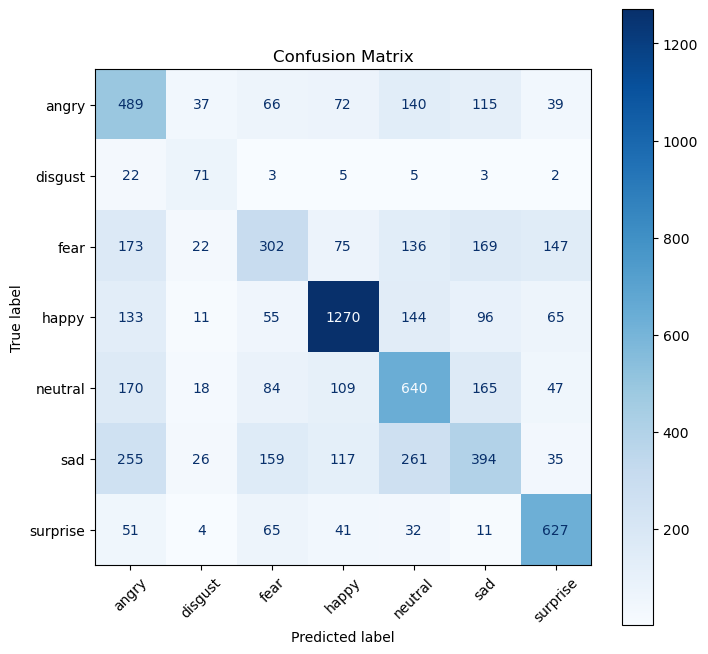

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def prikazi_confusion_matrix(model, dataloader, razredi):
    model.eval()
    vse_napovedi = []
    vse_prave = []

    with torch.no_grad():
        for slike, oznake in dataloader:
            izhodi = model(slike)
            _, napovedi = torch.max(izhodi, 1)
            vse_napovedi.extend(napovedi.cpu().numpy())
            vse_prave.extend(oznake.cpu().numpy())

    cm = confusion_matrix(vse_prave, vse_napovedi)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=razredi)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

prikazi_confusion_matrix(model2, test_loader, train_set.classes)

Zdaj pa si pogledamo še confusion matrix pred uporabo uteži:

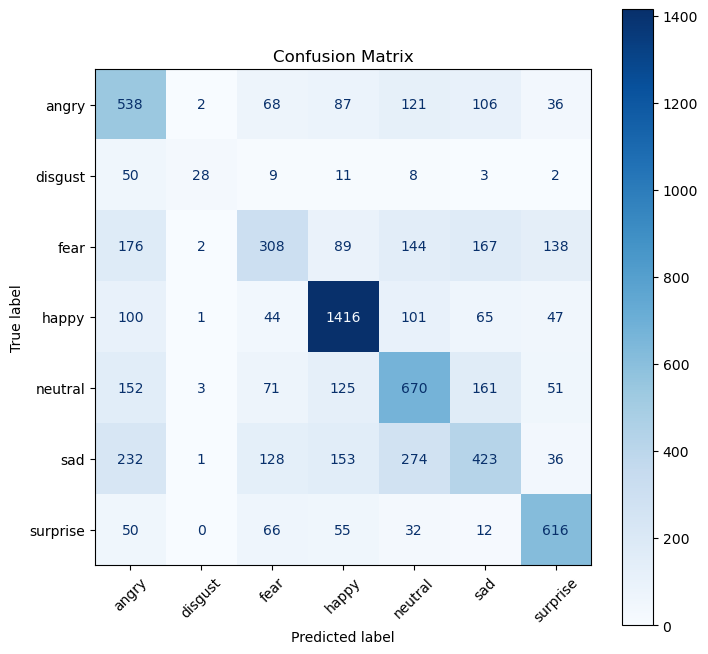

In [63]:
prikazi_confusion_matrix(model, test_loader, train_set.classes)

Vidimo, da dejansko bolj zastopane razrede po uporabi uteži napoveduje slabše, kar je pričakovano, vendar pa res manj zastopane razrede napoveduje boljše. 

Zamenjuje pa:
1. happy z neutral in angry
2. fear, sad, neutral

Torej je uporaba class_weights pomagala pri boljšem prepoznavanju redkih razredov, ampak še vedno ostajajo izziv napake med čustvi s podobno mimiko.
Zdaj bom poskusila umetno razširiti učno množico z uporabo novih transformacij. Pri tem transformiram le učne slike, testne pa ostanejo takšne, kot so.

In [105]:
# transformacija učnih slik
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(p=0.5),         # 50 % možnosti, da se obrne slika
    transforms.RandomRotation(degrees=10),          # zavrti za nor. 10 stopinj
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # rahla translacija
    transforms.ToTensor(),
    transforms.Normalize((0.5077,), (0.2120,))
])

# testne slike
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5077,), (0.2120,))
])

transform_train_set = datasets.ImageFolder(root=train_pot, transform=transform_train)
test_set = datasets.ImageFolder(root=test_pot, transform=transform_test)

batch_size = 128
transform_train_loader = DataLoader(transform_train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

Sedaj preizkusimo, ali bo model deloval kaj bolje.
INICIALIZACIJA MODELA:

In [106]:
torch.manual_seed(42)

model2 = EmotionCNN()
loss_fn2 = nn.CrossEntropyLoss(weight=train_class_weights_tensor)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)

In [107]:
from tqdm import tqdm

def train_model2(model, train_loader, loss_fn, optimizer, epochs):
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        with tqdm(total=len(train_loader.dataset), desc=f"Epoch {epoch+1}/{epochs}", unit='images') as prog_bar:
            for i, (images, labels) in enumerate(train_loader):
                optimizer.zero_grad()
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(loss=running_loss/(i+1), acc=correct/total)
                prog_bar.update(labels.size(0))

        print(f"Epoch {epoch+1} complete. Final Loss: {running_loss/(i+1)}, Accuracy: {correct/total}")

In [108]:
def test_model2(model, test_loader, loss_fn):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        with tqdm(total=len(test_loader.dataset), desc="Evaluating", unit='images') as prog_bar:
            for images, labels in test_loader:
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                test_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                prog_bar.set_postfix(acc=correct/total, loss=test_loss/(total/labels.size(0)))
                prog_bar.update(labels.size(0))

    print(f"Test Accuracy: {correct/total}, Avg. Loss: {test_loss/(total/labels.size(0))}, Correct predictions: {correct} / {total}")

In [109]:
print("Accuracy on the test set before training:")
test_model2(model2, test_loader, loss_fn2)

train_model2(model2, transform_train_loader, loss_fn2, optimizer2, 5)

print("Accuracy on the test set after training:")
test_model2(model2, test_loader, loss_fn2)


Accuracy on the test set before training:


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2184.61images/s, acc=0.115, loss=0.155]


Test Accuracy: 0.11549178044023405, Avg. Loss: 0.15487301163634873, Correct predictions: 829 / 7178


Epoch 1/5: 100%|██████████| 28709/28709 [00:27<00:00, 1047.62images/s, acc=0.211, loss=1.89]


Epoch 1 complete. Final Loss: 1.8943786006503636, Accuracy: 0.2106308126371521


Epoch 2/5: 100%|██████████| 28709/28709 [00:27<00:00, 1051.89images/s, acc=0.286, loss=1.8] 


Epoch 2 complete. Final Loss: 1.7958572223451403, Accuracy: 0.2855550524225853


Epoch 3/5: 100%|██████████| 28709/28709 [00:28<00:00, 1017.67images/s, acc=0.349, loss=1.69]


Epoch 3 complete. Final Loss: 1.6917292059792413, Accuracy: 0.3489149743982723


Epoch 4/5: 100%|██████████| 28709/28709 [00:29<00:00, 984.43images/s, acc=0.384, loss=1.6]  


Epoch 4 complete. Final Loss: 1.603499805662367, Accuracy: 0.38437423804381904


Epoch 5/5: 100%|██████████| 28709/28709 [00:29<00:00, 977.82images/s, acc=0.412, loss=1.54] 


Epoch 5 complete. Final Loss: 1.540145723025004, Accuracy: 0.4117175798530078
Accuracy on the test set after training:


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2261.40images/s, acc=0.455, loss=0.111]

Test Accuracy: 0.455001393145723, Avg. Loss: 0.11141595808235376, Correct predictions: 3266 / 7178


Model je spet slabši, kot je bil prej, zato bom zdaj poskusila napovedovati, brez da dajem dodatno težo redkejšim razredom in manjšo težo pogostejšim, in uporabila samo nove transformacije.

In [110]:
torch.manual_seed(42)

model3 = EmotionCNN()
loss_fn3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

In [85]:
print("Accuracy on the test set before training (only augmentation):")
test_model2(model3, test_loader, loss_fn3)

train_model2(model3, train_loader, loss_fn3, optimizer3, 5)

print("Accuracy on the test set after training (only augmentation):")
test_model2(model3, test_loader, loss_fn3)

Accuracy on the test set before training (only augmentation):


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 1836.87images/s, acc=0.115, loss=0.155]


Test Accuracy: 0.11549178044023405, Avg. Loss: 0.15487057098474766, Correct predictions: 829 / 7178


Epoch 1/5: 100%|██████████| 28709/28709 [00:39<00:00, 727.26images/s, acc=0.282, loss=1.75]


Epoch 1 complete. Final Loss: 1.7471034277809991, Accuracy: 0.28196732731895924


Epoch 2/5: 100%|██████████| 28709/28709 [00:35<00:00, 816.77images/s, acc=0.373, loss=1.6]  


Epoch 2 complete. Final Loss: 1.602912122408549, Accuracy: 0.37340206903758405


Epoch 3/5: 100%|██████████| 28709/28709 [00:34<00:00, 826.89images/s, acc=0.421, loss=1.5]  


Epoch 3 complete. Final Loss: 1.495527334213257, Accuracy: 0.4212964575568637


Epoch 4/5: 100%|██████████| 28709/28709 [00:29<00:00, 958.10images/s, acc=0.451, loss=1.43] 


Epoch 4 complete. Final Loss: 1.4260641368230185, Accuracy: 0.4512173882754537


Epoch 5/5: 100%|██████████| 28709/28709 [00:33<00:00, 851.20images/s, acc=0.475, loss=1.38]


Epoch 5 complete. Final Loss: 1.3790668413374159, Accuracy: 0.474798843568219
Accuracy on the test set after training (only augmentation):


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 1948.13images/s, acc=0.51, loss=0.1]  

Test Accuracy: 0.5100306492059069, Avg. Loss: 0.10015513773879889, Correct predictions: 3661 / 7178


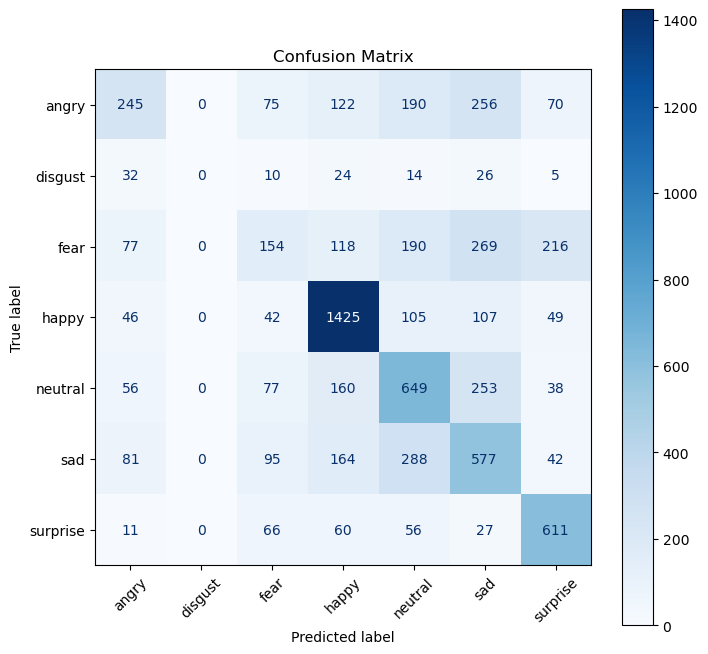

In [75]:
prikazi_confusion_matrix(model3, test_loader, train_set.classes)

Vidimo, da je model boljši pri napovedovanju čustev iz razredov z dovolj podatki, medtem ko za najmanj zastopan razred "disgust" ni naredil niti ene pravilne napovedi oz. se ga sploh ni naučil in ga nikoli ni napovedal. Model ima še vedno težave ločevati podobne izraze, npr. "sad", "fear", "neutral". To se zdi nekako smiselno, saj imamo take težave pogosto tudi ljudje sami.

Ker bi še vedno želela, da model vsaj bolje prepoznava "disgust", bom poskusila uporabiti WeightedRandomSampler, da bo model pogosteje videl primere tega razreda in imel s tem več priložnosti, da se ta razred nauči. Pri tem ne bom uporabljala dodatnih transformacij, saj lahko smer pogleda, simetrija ipd. nosijo pomembne informacije.

In [113]:
from torch.utils.data import WeightedRandomSampler

target_labels_train = [label for img, label in train_set]

class_counts = Counter(target_labels_train)

num_samples = len(target_labels_train)
num_classes = len(class_counts)

class_weights = {cls: num_samples / (num_classes * count) for cls, count in class_counts.items()}

sample_weights = [class_weights[label] for label in target_labels_train]

# ustvari WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# nov train_loader s tem samplerjem
train_loader_sampler = DataLoader(train_set, batch_size=128, sampler=sampler)

In [114]:
torch.manual_seed(42)

model_sampler = EmotionCNN()
loss_fn_sampler = nn.CrossEntropyLoss()
optimizer_sampler = torch.optim.Adam(model_sampler.parameters(), lr=0.001)

In [115]:
print("Accuracy on the test set before training (only augmentation):")
test_model2(model_sampler, test_loader, loss_fn_sampler)

train_model2(model_sampler, train_loader_sampler, loss_fn_sampler, optimizer_sampler, 5)

print("Accuracy on the test set after training (only augmentation):")
test_model2(model_sampler, test_loader, loss_fn_sampler)

Accuracy on the test set before training (only augmentation):


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2331.10images/s, acc=0.115, loss=0.155]


Test Accuracy: 0.11549178044023405, Avg. Loss: 0.15487057098474766, Correct predictions: 829 / 7178


Epoch 1/5: 100%|██████████| 28709/28709 [00:24<00:00, 1193.38images/s, acc=0.318, loss=1.72]


Epoch 1 complete. Final Loss: 1.7243670839733547, Accuracy: 0.3184018948761712


Epoch 2/5: 100%|██████████| 28709/28709 [00:25<00:00, 1134.62images/s, acc=0.463, loss=1.42]


Epoch 2 complete. Final Loss: 1.4183873319625855, Accuracy: 0.4628862029328782


Epoch 3/5: 100%|██████████| 28709/28709 [00:24<00:00, 1183.13images/s, acc=0.537, loss=1.22]


Epoch 3 complete. Final Loss: 1.2227777700954015, Accuracy: 0.5368003065240865


Epoch 4/5: 100%|██████████| 28709/28709 [00:29<00:00, 969.79images/s, acc=0.578, loss=1.11] 


Epoch 4 complete. Final Loss: 1.1082753284772238, Accuracy: 0.5782507227698631


Epoch 5/5: 100%|██████████| 28709/28709 [00:25<00:00, 1141.80images/s, acc=0.608, loss=1.03]


Epoch 5 complete. Final Loss: 1.0289526234732733, Accuracy: 0.6084851440314883
Accuracy on the test set after training (only augmentation):


Evaluating: 100%|██████████| 7178/7178 [00:03<00:00, 2131.02images/s, acc=0.508, loss=0.102]

Test Accuracy: 0.5078016160490387, Avg. Loss: 0.10159649708437768, Correct predictions: 3645 / 7178


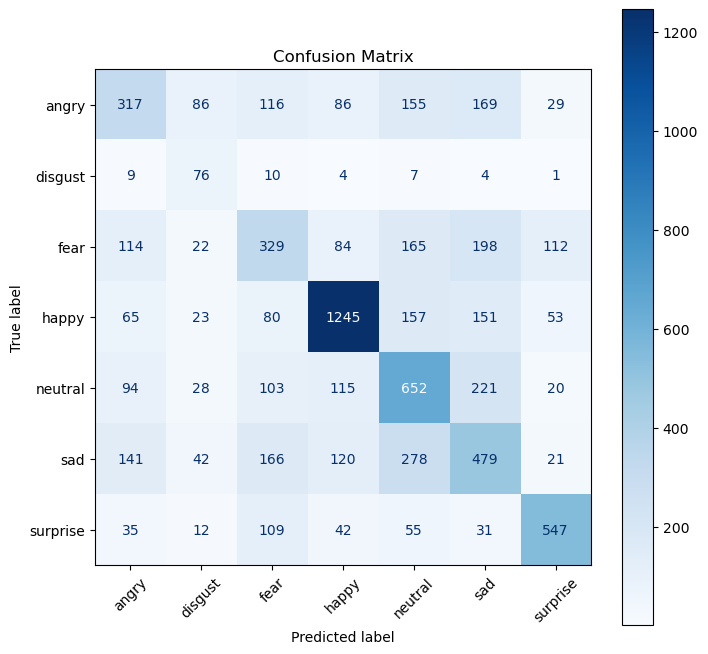

In [116]:
prikazi_confusion_matrix(model_sampler, test_loader, train_set.classes)

Razred "disgust" ima zdaj največ pravilnih napovedi do sedaj, še vedno pa je pogosto zamešan z "angry". Še vedno pa prihaja do mešanja med podobnimi čustvi.